# Density Estimation

Using histogram and probability density plot to visualize distribution have many tiny tricks. It's been known that the exact probability of continuous distribution could not be derived directl, unlike that of discrete distribution where the probability for each possible outcome is readily available with the probability mass function. So over the years many statisticians wanted to improve the quality of visualizing continuous distributions by estimating the probability density in the density plots

In this video, we'll look into the most common density estimation method, **kernel density estimation**. 
Kernel density estimation is an approximation technique that allows you to create a smooth curve given a set of data. What it produces is an estimate of the underlying distribution of the data points, even when the actual distribution is unknown. Let's do some coding on the weather forecast example which we've introduced in week 2. 


The kernel density estimation algorithm takes in a parameter called **bandwidth**, which governs how "smooth" the resulting curve looks like.  Perhaps the most common use of kernel density estimation is in the Seaborn visualization library where the built-in sns.kdeplot can help visualize uni-dimensional or two-dimensional data in a continuous, smoothed kernel density plot.

The kernel density estimation is calculated by weighting the distances of all the data points for each location. If we've seen more data points nearby, the estimate tends to be higher, indicating the more likely that such location will be the value we're looking for. In other words, it smooths or interpolates the probabilities across the range of outcomes for a random variable restricted to the bandwidth it belongs to. How amazing it estimates a distribution solely by observations! 

In [ ]:
# Let's import seaborn as sns
import seaborn as sns
# and pandas as pd
import pandas as pd
# and bring in the weather dataset from assets folder, year_weather.csv file
weather = pd.read_csv('assets/year_weather.csv')
# We want to take a look about the first 10 rows.
weather.head(10)
# This weather dataset witnesses the yearly snow, number of days getting snow, yearly precipitation, 
# number of rainy data, yearly average temperature in Detroit region, New York City and San Franscisco region.
# For each of the region, the dataset contains the record from 1990 to 2019.

,year,region,state,snow_inches,num_snow_day,precipitation_inches,num_rain_day,year_avg_temp
0,1990,Detroit,Michigan,41.8,36.4,42.6,171,51.3
1,1991,Detroit,Michigan,31.4,32.2,29.6,115,52.0
2,1992,Detroit,Michigan,43.5,24.7,37.3,153,48.8
3,1993,Detroit,Michigan,52.2,41.9,30.6,118,49.9
4,1994,Detroit,Michigan,45.8,31.9,31.0,117,50.4
5,1995,Detroit,Michigan,33.5,22.1,28.8,113,50.0
6,1996,Detroit,Michigan,27.6,29.2,27.4,107,48.2
7,1997,Detroit,Michigan,43.1,38.1,34.0,130,48.5
8,1998,Detroit,Michigan,23.4,27.7,34.9,135,53.5
9,1999,Detroit,Michigan,49.5,35.4,32.2,122,51.3


<AxesSubplot:xlabel='year_avg_temp', ylabel='Density'>

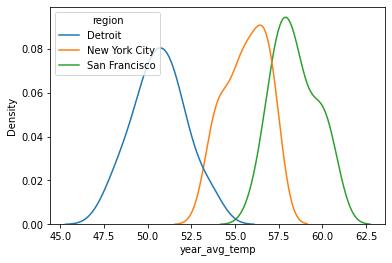

In [ ]:
# Now let's build a distribution for the yearly average temperature for the three weather regions.
# To let's say compare the distributions of yearly average temperatures for each station, we can use the built-in 
# Seaborn kdeplot function, pass in the data called weather, and plot the 
# column called year_avg_temp, and finally make a separate plot for each region using the hue option.
sns.kdeplot(data = weather, x = "year_avg_temp", hue = "region") 
# Well! Before reading and interpreting the graph, I personally not feeling very satisfied about this density plot. 
# I personally love the shade under the curve which is more aesthetically pleasant.
# Let's customize a bit to make it looks nicer.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='year_avg_temp', ylabel='Density'>

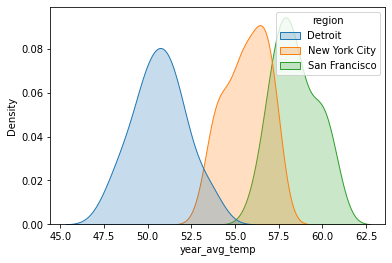

In [ ]:
# So we can add some shade to cover the area under each curve by passing the shade equals True option.
# We might think of also changing a different kernel to see which kernel looks smoother and more
# approximating the data distribution. In this attempt we try the exponential kernel.
sns.kdeplot(data = weather, x = "year_avg_temp", hue = "region", shade=True, kernel= 'exponential') 
# Interesting! You'll see a user warning from seaborn that in the latest update, the support for 
# alternate kernels has been removed, and seaborn insists in using the Gaussian kernel for density estimation.
# I won't go into the detail of why seaborn made this update recently, but it's great for you to know that 
# there are alternative kernel functions (rephrase from here) that weight the contribution of observations from a data sample 
# based on their relationship or distance to a given query sample for which the probability is requested.

# Looking closely into the probability densities for Detroit, New York City and San Francisco, we'll
# see that each of the curves is smoothed to look continuous, as opposed to the discrete count shown
# in a histogram. What was achieved through the kernel density estimation method. Seaborn package
# computes all of the non-parametric height for each region based on the bandwidth user specify, and
# it's by default a very high number which makes the estimation kind of smoothed like a normal distribution.



/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='precipitation_inches', ylabel='Density'>

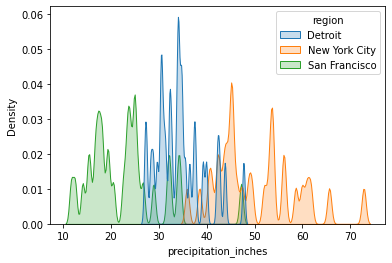

In [ ]:
# Make a kdeplot for precipitation with changing bandwidths

sns.kdeplot(data = weather, x = "precipitation_inches", hue = "region", shade=True, bw = 0.05)
# Many fluctuations

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='precipitation_inches', ylabel='Density'>

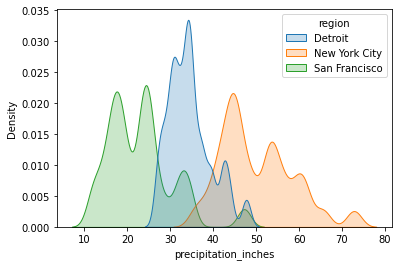

In [ ]:
sns.kdeplot(data = weather, x = "precipitation_inches", hue = "region", shade=True, bw = 0.2)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='precipitation_inches', ylabel='Density'>

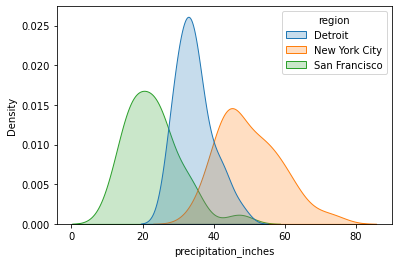

In [ ]:
sns.kdeplot(data = weather, x = "precipitation_inches", hue = "region", shade=True, bw = 0.5)

In this tutorial, you discovered a gentle introduction to kernel density estimation methods. It's a fast and reliable way to visualize the probability density of a data sample, and specially, it fits a model to the data to make an arbitrary distribution that approximates how the true distribution should look like. 

Do you have any questions? Let's see in the next video!

Reference: 

* https://scikit-learn.org/stable/modules/density.html
* https://mathisonian.github.io/kde/

In [ ]:
# Appendix A: Code for plot

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KernelDensity

# We make a uni-dimensional data. Set number of sample to be 500
#n_sample = 500
# Make a bimodal distribution using normal mixture random variables

# Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension, when used once.
#normal_mixture = np.concatenate((stats.norm.rvs(0, 1, int(0.3*n_sample)), 
#stats.norm.rvs(6, 1.5, int(0.7 * n_sample))))[:, np.newaxis]

x = np.linspace(0, 100,1000)[:, np.newaxis]
#true_density = (0.3 * stats.norm(0,1).pdf(x[:, 0]) + 0.7 * stats.norm(6,1.5).pdf(x[:, 0]))


* Non-parametric way: meaning we aren't assuming any underlying distribution for our data. For example, we don't assume that our data come from a Gaussian distribution, we don't have a mean and standard deviation to fit.
* To build a KDE plot, we're going start with a set of finite data. Then we're going to add in a little kernel, centered about each data point for every single data point. Eventually all I need to do is just add these together, and as I am adding each of these kernels together, I'm getting closer and closer to a probability density function, and the end result is going to be our kernel density estimation.
*  The kdeplot gives us a sense of what [horsepower these cars have]. [Most cars have around 80 for their horsepower, but there are some care over here in the 150 range] 
* Bandwidth can make a really big difference in plots. If we decrease the bandwidth, you'll see more and more jagged peaks, that's increasing the variance of the kernel density estimation. On the other hand, if we increase the bandwidth, we'll start to see the curve smoothed out, and in fact you'll possibly lose out the mode on your data, especially if you have more than one peak.
* In `sns.kdeplot()`, the default bandwidth is actually Scott or Silverman's rule. Particularly, Silverman's rule of thumb computes the optimal h by assuming that the data is normally distributed.
* The Improved Sheather Joned (ISJ) algorithm is more robust to multimodality. Alleviate the poor estimate because bandwidth is too much
* 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d164461f-c4b7-4df2-b711-3a9e5e978d4a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>